In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from GeneticKnapsackSolver01 import GeneticKnapsackSolver01
from SimulatedAnnealingKnapsackSolver01 import SimulatedAnnealingKnapsackSolver01
from matplotlib.animation import FuncAnimation
from GeneticKnapsackSolver import GeneticKnapsackSolver
from SimulatedAnnealingKnapsackSolver import SimulatedAnnealingKnapsackSolver

In [2]:
def generate_knapsack_dat01(
    filename="knapsack_data.txt",
    num_items=30,
    weight_range=(1, 20),
    value_range=(10, 100),
    capacity_factor=0.5
):

    items = []
    total_weight = 0

    for _ in range(num_items):
        weight = random.randint(*weight_range)
        value = random.randint(*value_range)
        items.append((weight, value))
        total_weight += weight

    # Задаємо місткість рюкзака як частину повної ваги 
    W = int(total_weight * capacity_factor)

    with open(filename, "w") as f:
        f.write(f"{W}\n")
        for weight, value in items:
            f.write(f"{weight} {value}\n")

    print(f"Файл '{filename}' створено з {num_items} предметами і місткістю рюкзака {W}.")

    return W, items

In [3]:
def generate_knapsack_data(
    filename="knapsack_data.txt",
    num_items=30,
    weight_range=(1, 20),
    value_range=(10, 100),
    max_count_range=(1, 10),
    capacity_factor=0.5
):

    items = []
    total_weight = 0

    for _ in range(num_items):
        weight = random.randint(*weight_range)
        value = random.randint(*value_range)
        max_count = random.randint(*max_count_range)
        items.append((weight, value, max_count))
        total_weight += weight * max_count

    W = int(total_weight * capacity_factor)

    with open(filename, "w") as f:
        f.write(f"{W}") 
        for weight, value, max_count in items:
            f.write(f"{weight} {value} {max_count}\n")

    print(f"Файл '{filename}' створено з {num_items} предметами і місткістю рюкзака {W}.")

    return W, items

In [4]:
def load_knapsack_data_01(filename="knapsack_data.txt"):
    with open(filename, "r") as f:
        W = int(f.readline().strip())
        items = []
        for line in f:
            weight, value = map(int, line.strip().split())
            items.append((weight, value))
    return W, items  

In [5]:
def load_knapsack_data(filename="knapsack_data.txt"):
    with open(filename, "r") as f:
        W = int(f.readline().strip())
        items = []
        for line in f:
            weight, value, max_count = map(int, line.strip().split())
            items.append((weight, value, max_count))
    return W, items

In [6]:
def plot_combined(gen_solver, sa_solver):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    axs[0].plot(gen_solver.best_values, label='Генетичний алгоритм', color='blue')
    axs[0].plot(sa_solver.best_values, label='Імітація відпалу', color='orange')
    axs[0].set_title("Збіжність алгоритмів")
    axs[0].set_xlabel("Ітерації / Покоління")
    axs[0].set_ylabel("Найкраще значення")
    axs[0].legend()
    axs[0].grid(True)


    indices = np.arange(len(gen_solver.best))
    axs[1].bar(indices, gen_solver.best, label=f'Генетичний (Value={gen_solver.best_value})', color='blue', alpha=0.6)
    axs[1].bar(indices, sa_solver.best, label=f'Імітація відпалу (Value={sa_solver.best_fitness})', color='orange', alpha=0.6)
    axs[1].set_xticks([i for i in indices if i % 2 == 1])
    axs[1].set_title("Вибрані предмети")
    axs[1].set_xlabel("Номер предмета")
    axs[1].set_ylabel("Вибрано (1 — так, 0 — ні)")
    axs[1].legend()
    axs[1].grid(axis='y')

    plt.tight_layout()
    plt.show()

# Графіки

## 20

In [7]:
capacity_test_20, items_test_20 = generate_knapsack_data("data/example_knapsack_20.txt", num_items=20)
weights_test_20 = [item[0] for item in items_test_20]
values_test_20 = [item[1] for item in items_test_20]
max_counts_test_20 = [item[2] for item in items_test_20]

Файл 'data/example_knapsack_20.txt' створено з 20 предметами і місткістю рюкзака 687.


### Genetic

Генетичний алгоритм: цінність = 5233


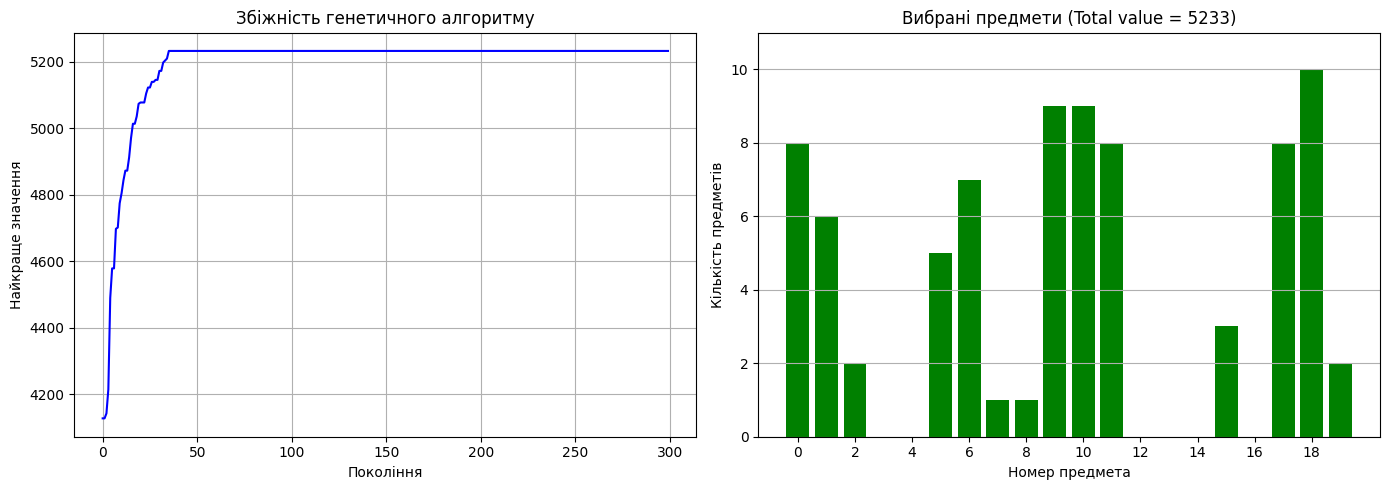

In [8]:
# Генетичний алгоритм
ga_solver_20 = GeneticKnapsackSolver(weights_test_20, values_test_20, max_counts_test_20, capacity_test_20)
best_ga_test_20, value_ga_20, all_population_20, best_values_20  = ga_solver_20.solve()
print("Генетичний алгоритм: цінність =", value_ga_20)
ga_solver_20.plot()


### Annealing

Імітація відпалу: цінність = 5219


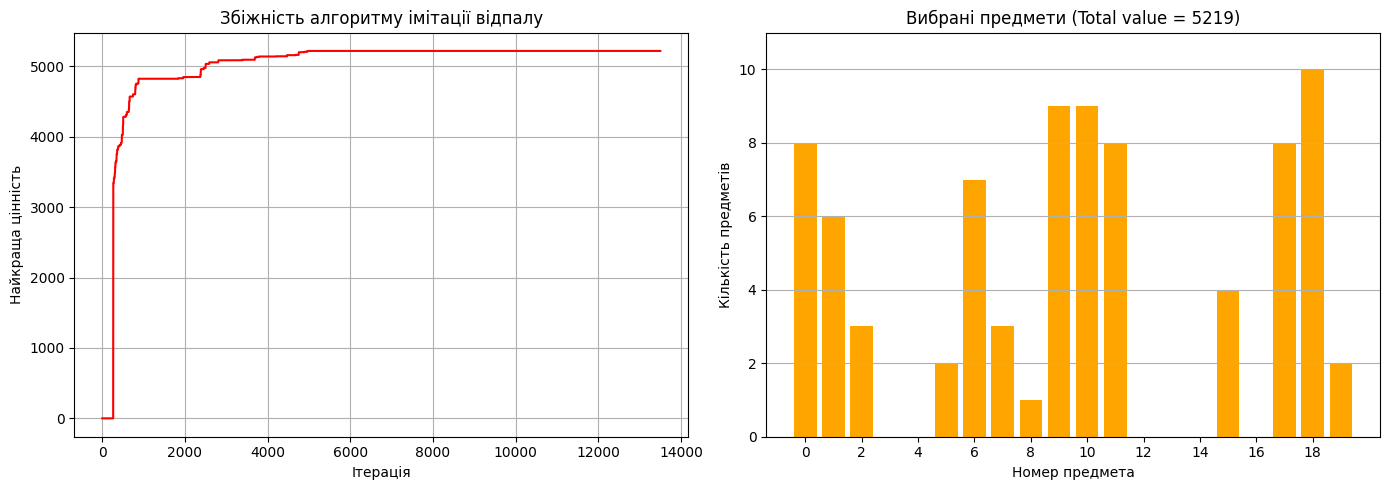

In [9]:
sa_solver_20 = SimulatedAnnealingKnapsackSolver(weights_test_20, values_test_20, max_counts_test_20, capacity_test_20)
best_sa_20, value_sa_20 = sa_solver_20.solve()
print("Імітація відпалу: цінність =", value_sa_20)
sa_solver_20.plot()

### Combo

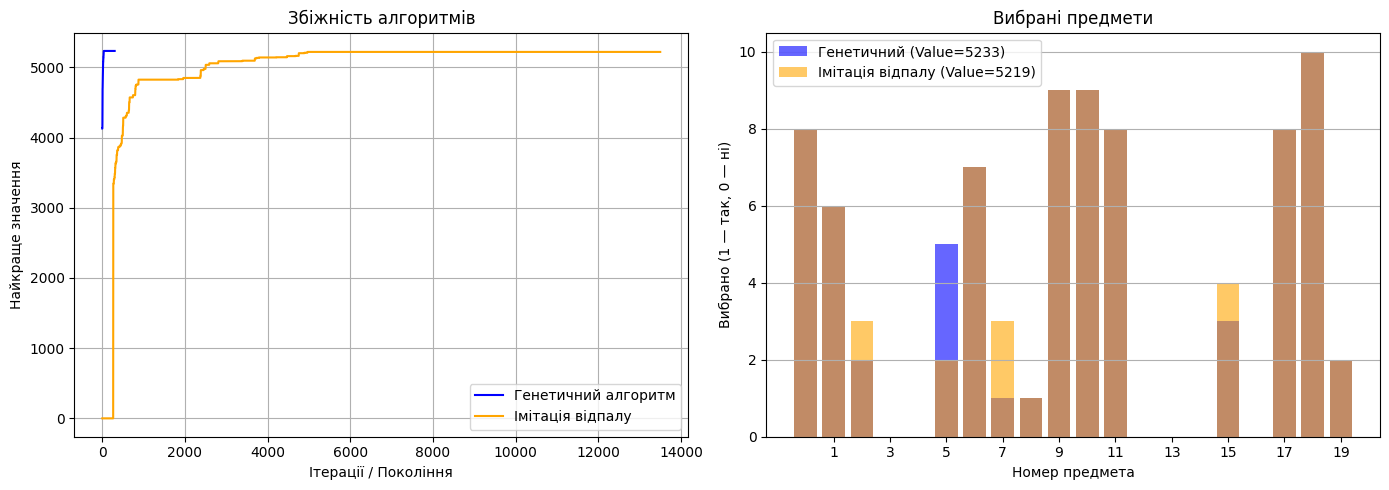

In [10]:
plot_combined(ga_solver_20, sa_solver_20)

## 40

In [11]:
capacity_test_40, items_test_40 = generate_knapsack_data("data/example_knapsack_40.txt", num_items=40)
weights_test_40 = [item[0] for item in items_test_40]
values_test_40 = [item[1] for item in items_test_40]
max_counts_test_40 = [item[2] for item in items_test_40]

Файл 'data/example_knapsack_40.txt' створено з 40 предметами і місткістю рюкзака 1133.


### Genetic

Генетичний алгоритм: цінність = 9791


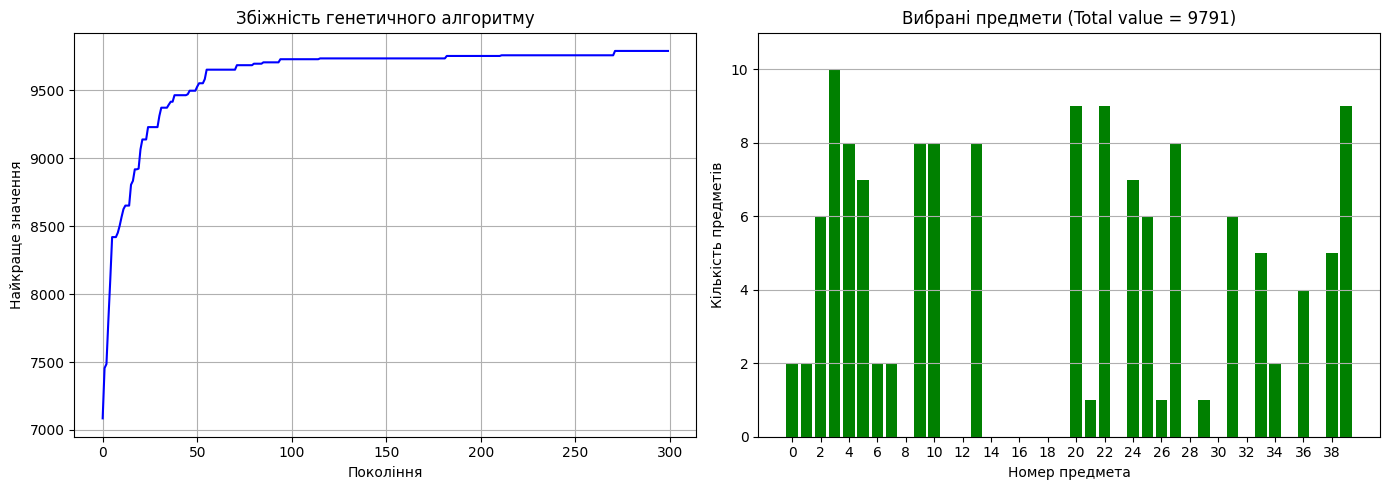

In [12]:
ga_solver_40 = GeneticKnapsackSolver(weights_test_40, values_test_40, max_counts_test_40, capacity_test_40)
best_ga_test_40, value_ga_40, all_population_40, best_values_40  = ga_solver_40.solve()
print("Генетичний алгоритм: цінність =", value_ga_40)
ga_solver_40.plot()

### Annealing

Імітація відпалу: цінність = 9292


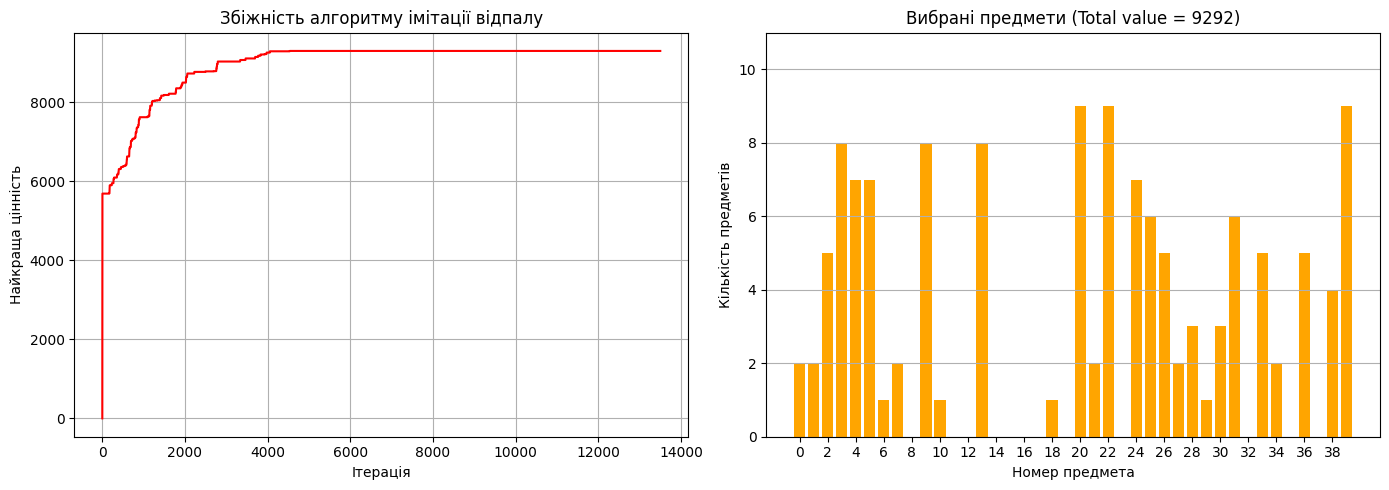

In [13]:
sa_solver_40 = SimulatedAnnealingKnapsackSolver(weights_test_40, values_test_40, max_counts_test_40, capacity_test_40)
best_sa_40, value_sa_40 = sa_solver_40.solve()
print("Імітація відпалу: цінність =", value_sa_40)
sa_solver_40.plot()

### Combo

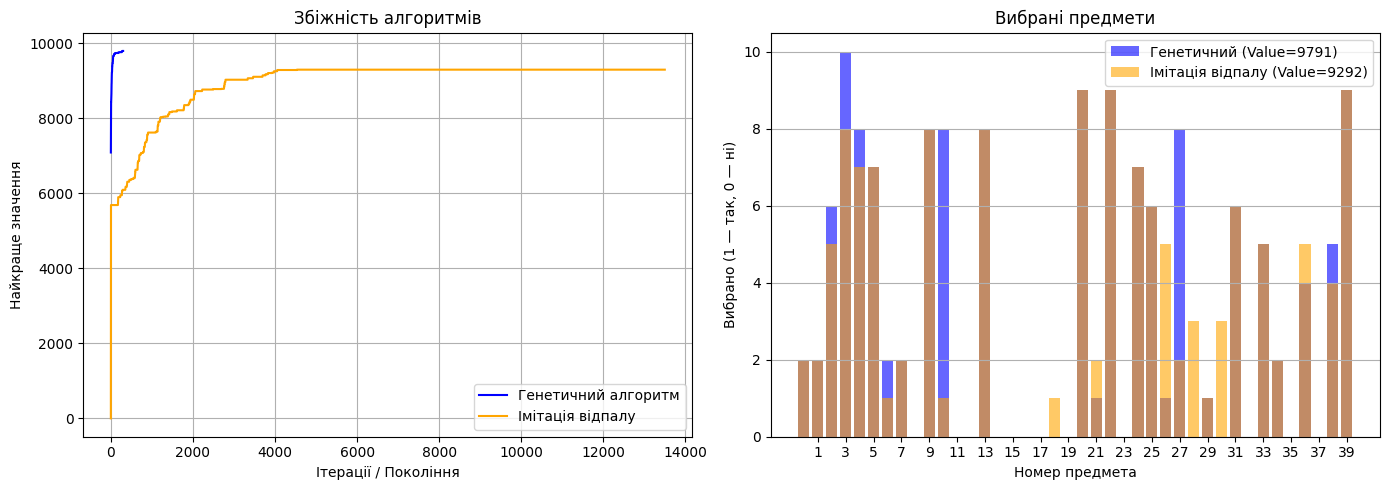

In [14]:
plot_combined(ga_solver_40, sa_solver_40)

## 80

In [15]:
capacity_test_80, items_test_80 = generate_knapsack_data("data/example_knapsack_80.txt", num_items=80)
weights_test_80 = [item[0] for item in items_test_80]
values_test_80 = [item[1] for item in items_test_80]
max_counts_test_80 = [item[2] for item in items_test_80]

Файл 'data/example_knapsack_80.txt' створено з 80 предметами і місткістю рюкзака 2586.


### Genetic

Генетичний алгоритм: цінність = 18545


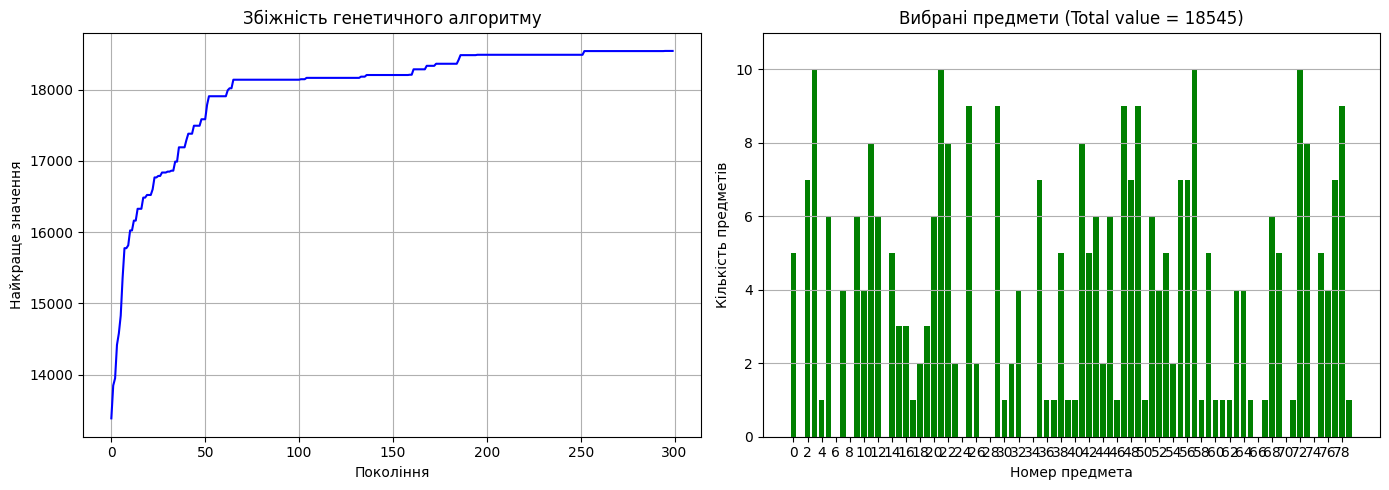

In [16]:
ga_solver_80 = GeneticKnapsackSolver(weights_test_80, values_test_80, max_counts_test_80, capacity_test_80)
best_ga_test_80, value_ga_80, all_population_80, best_values_80  = ga_solver_80.solve()
print("Генетичний алгоритм: цінність =", value_ga_80)
ga_solver_80.plot()

### Annealing

Імітація відпалу: цінність = 17895


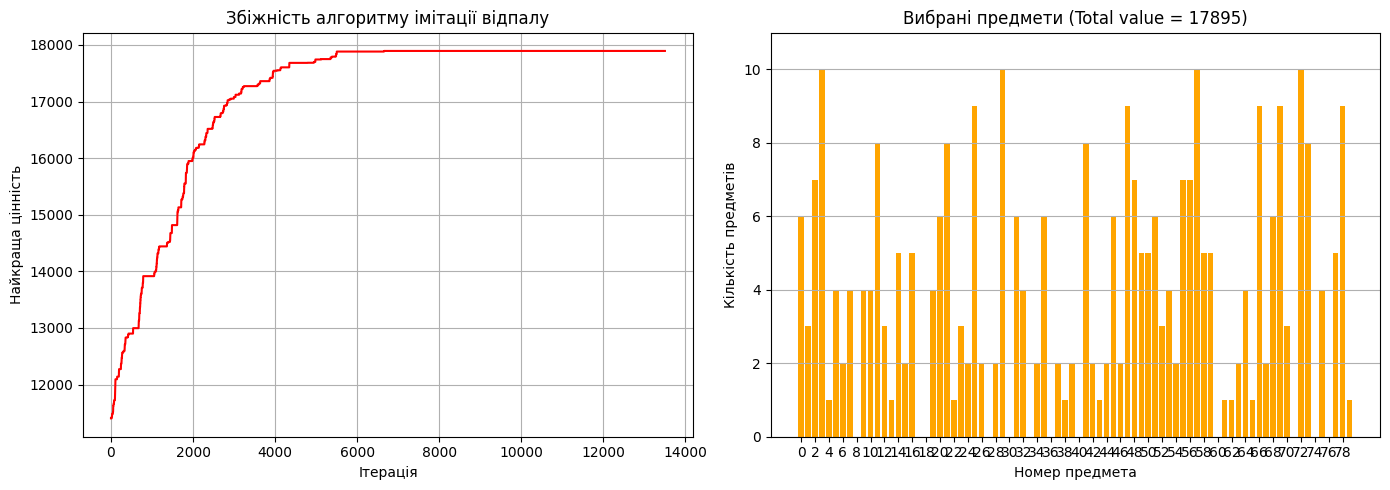

In [17]:
sa_solver_80 = SimulatedAnnealingKnapsackSolver(weights_test_80, values_test_80, max_counts_test_80, capacity_test_80)
best_sa_80, value_sa_80 = sa_solver_80.solve()
print("Імітація відпалу: цінність =", value_sa_80)
sa_solver_80.plot()

### Combo

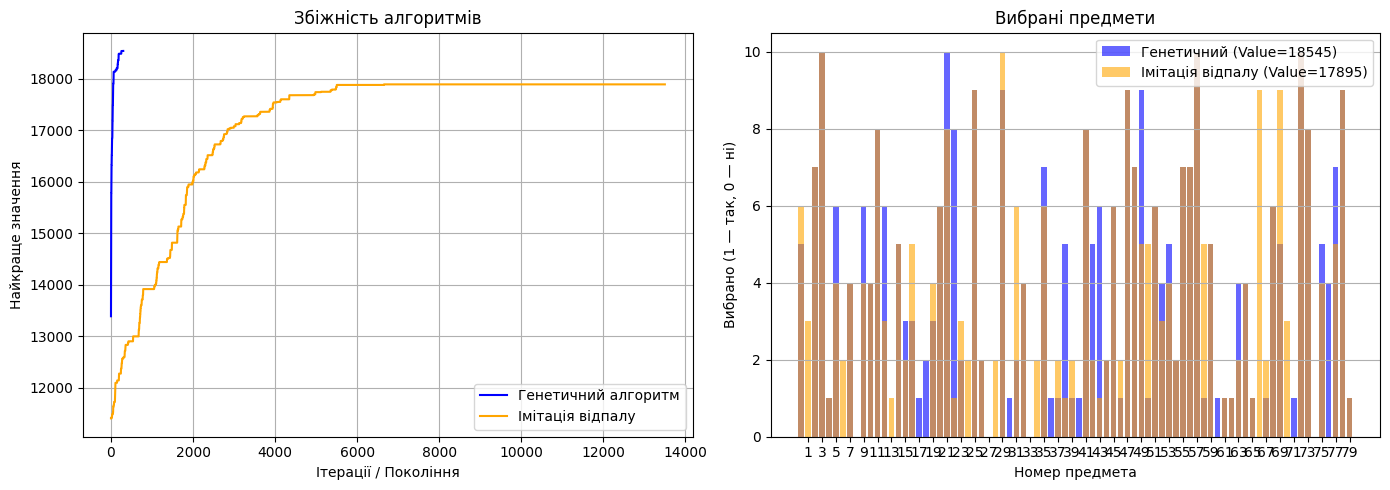

In [18]:
plot_combined(ga_solver_80, sa_solver_80)

# Додаткове завдання

In [19]:
capacity_05, items_05 = load_knapsack_data_01(filename="data/Data05.txt")
weights_05 = [item[0] for item in items_05]
values_05 = [item[1] for item in items_05]

Генетичний алгоритм: цінність = 1290


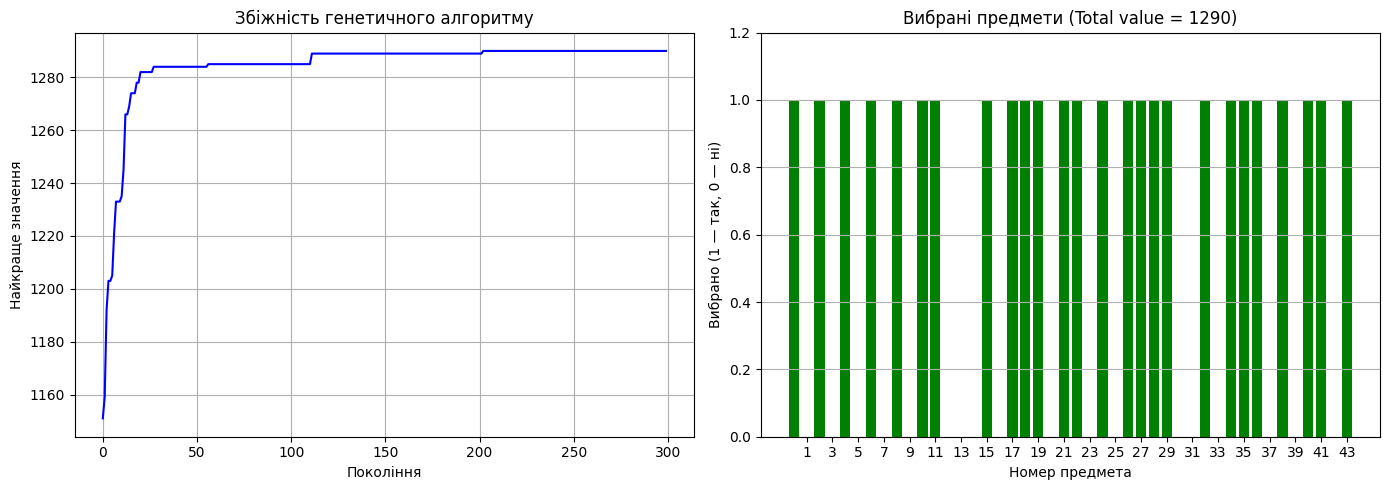

In [20]:
ga_solver_05 = GeneticKnapsackSolver01(weights_05, values_05, capacity_05)
best_ga_05, value_ga_05, all_population_05, best_values_05 = ga_solver_05.solve()
print("Генетичний алгоритм: цінність =", value_ga_05)
ga_solver_05.plot()

Імітація відпалу: цінність = 1227


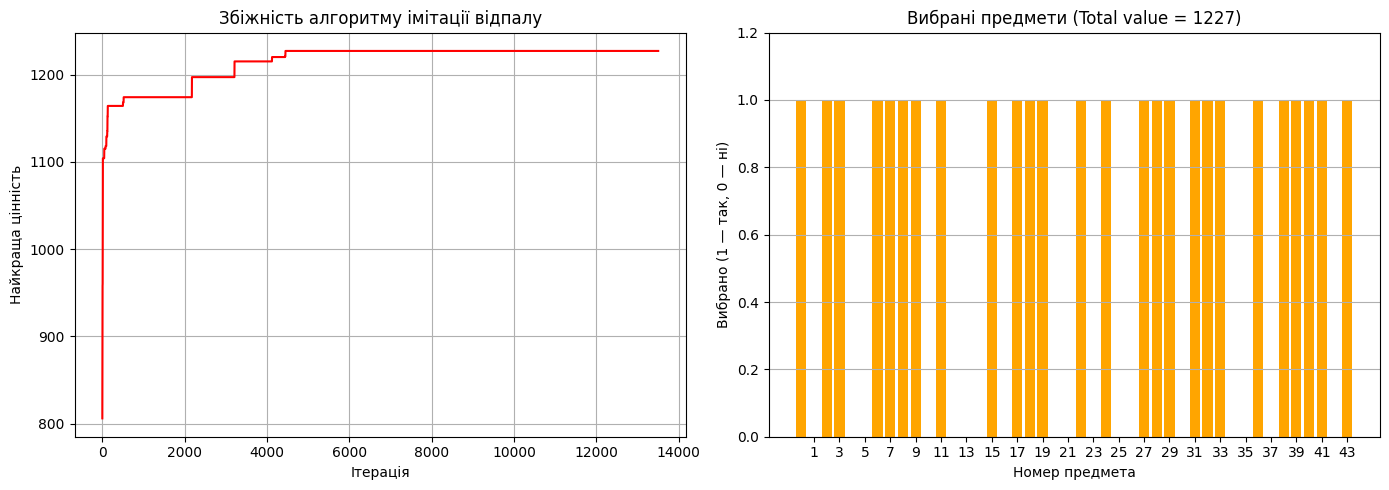

In [21]:
sa_solver_05 = SimulatedAnnealingKnapsackSolver01(weights_05, values_05, capacity_05)
best_sa_05, value_sa_05 = sa_solver_05.solve()
print("Імітація відпалу: цінність =", value_sa_05)
sa_solver_05.plot()

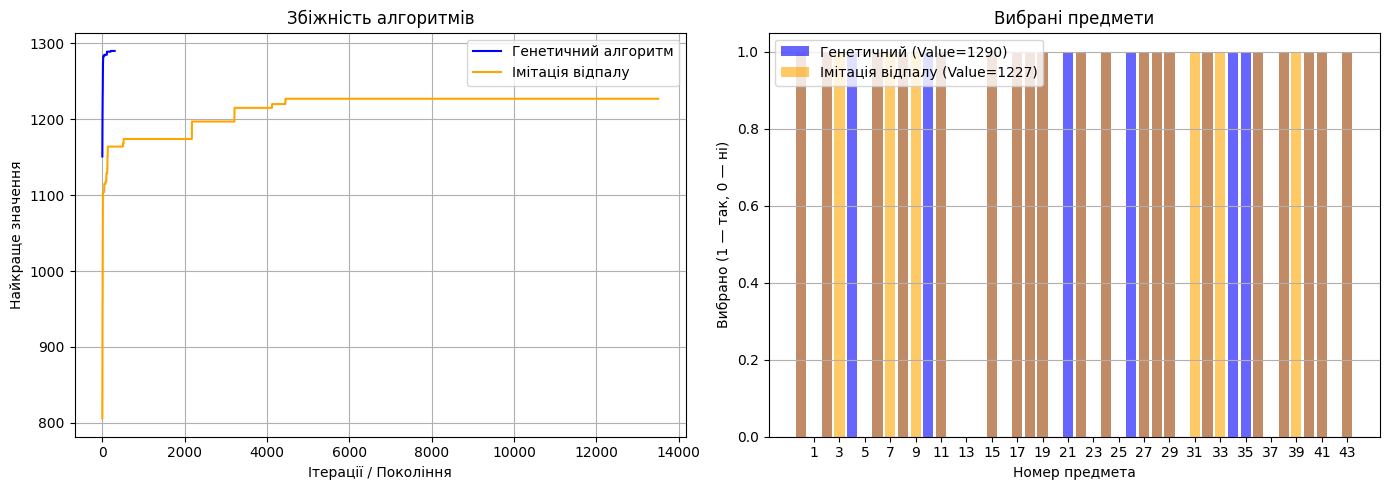

In [22]:
plot_combined(ga_solver_05, sa_solver_05)

In [23]:
capacity_19, items_19 = load_knapsack_data_01(filename="data/Data19.txt")
weights_19 = [item[0] for item in items_19]
values_19 = [item[1] for item in items_19]

Генетичний алгоритм: цінність = 2895


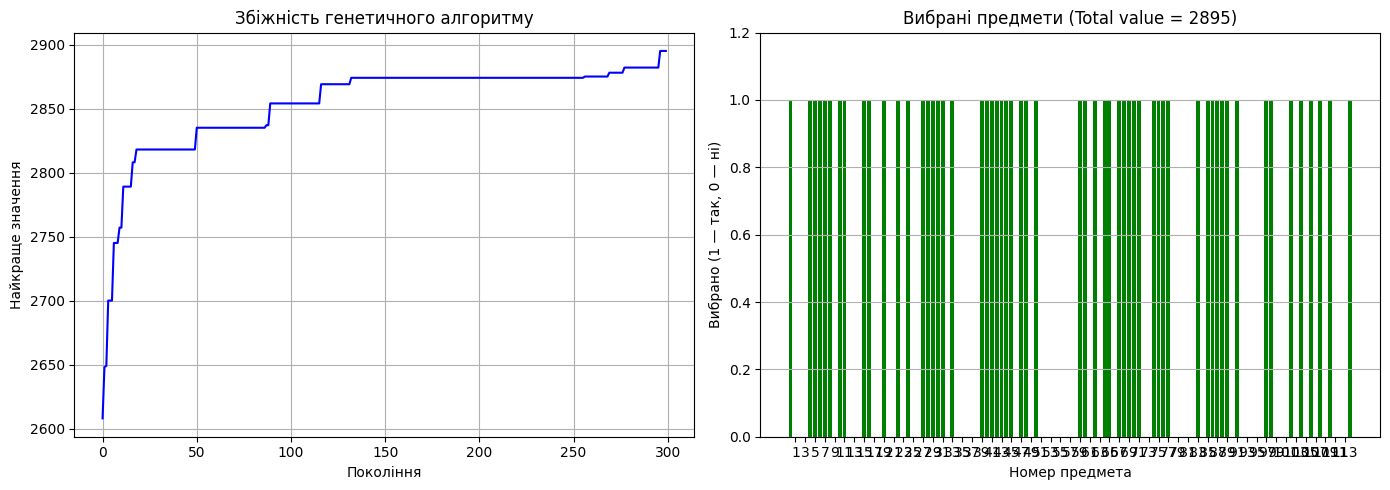

In [24]:
ga_solver_19 = GeneticKnapsackSolver01(weights_19, values_19, capacity_19)
best_ga_19, value_ga_19, all_population_19, best_values_19 = ga_solver_19.solve()
print("Генетичний алгоритм: цінність =", value_ga_19)
ga_solver_19.plot()

Імітація відпалу: цінність = 2762


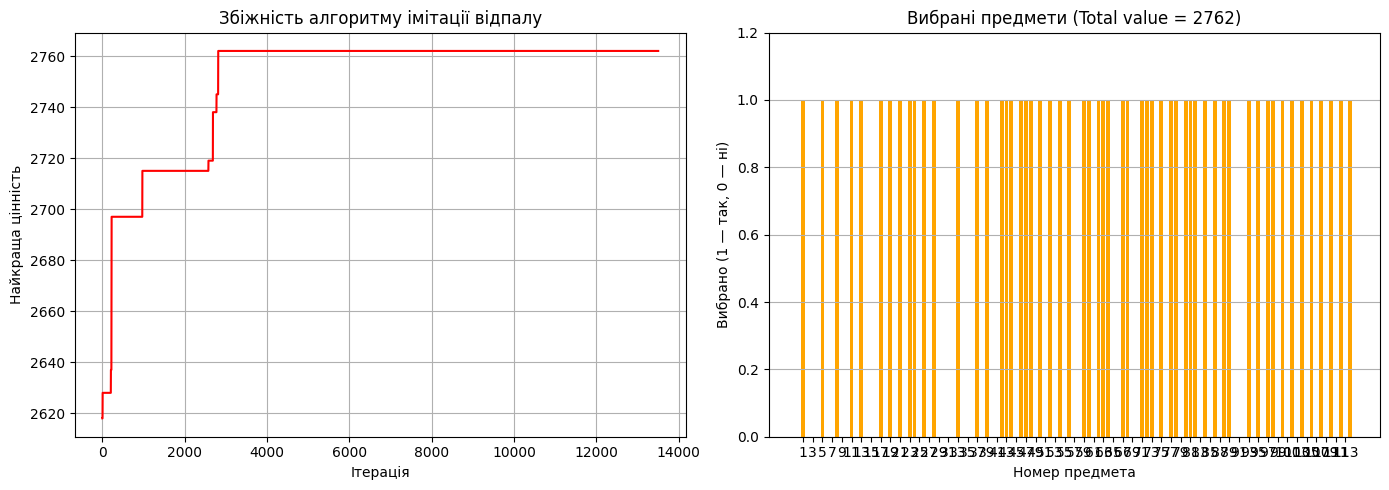

In [25]:
sa_solver_19 = SimulatedAnnealingKnapsackSolver01(weights_19, values_19, capacity_19)
best_sa_19, value_sa_19 = sa_solver_19.solve()  
print("Імітація відпалу: цінність =", value_sa_19)
sa_solver_19.plot()

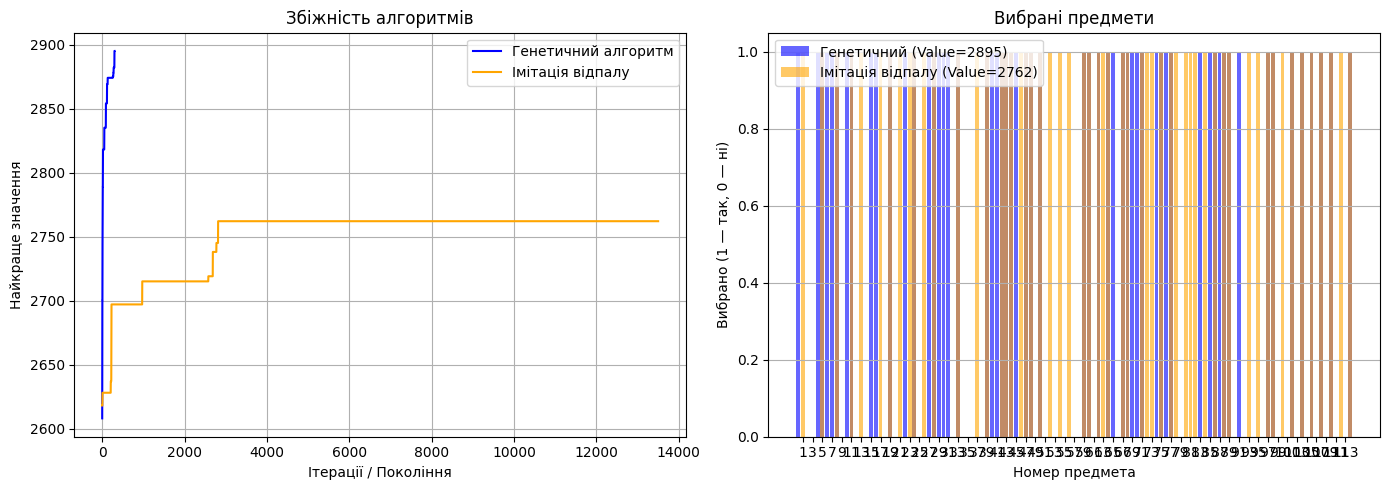

In [26]:
plot_combined(ga_solver_19, sa_solver_19)

# Gifs

In [27]:
def animate_genetic_algorithm(all_population, best_values, fitness_func, max_counts, save_path='gifs/genetic_algorithm.gif'):
    generations = len(all_population)
    population_size = len(all_population[0])
    N = len(all_population[0][0])

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    bar_population = axs[0].bar(range(population_size), [0]*population_size, color='skyblue')
    bar_best = axs[1].bar(range(N), [0]*N, color='orange')

    axs[0].set_title("Гістограма популяції (значення цільової функції)")
    axs[0].set_xlabel("Номер хромосоми")
    axs[0].set_ylabel("Значення цільової функції")
    axs[0].set_ylim(0, max(best_values)*1.1)
    axs[0].grid(True)

    axs[1].set_title("Вибрані предмети найкращої особи")
    axs[1].set_xlabel("Номер предмета")
    axs[1].set_ylabel("Кількість предметів")
    axs[1].set_ylim(0, max(max_counts) + 1)
    axs[1].grid(axis='y')

    def update(frame):
        population = all_population[frame]
        fitness_values = [fitness_func(ind) for ind in population]
        best_idx = np.argmax(fitness_values)
        best_individual = population[best_idx]

        for rect, h in zip(bar_population, fitness_values):
            rect.set_height(h)
            
        for rect, h in zip(bar_best, best_individual):
            rect.set_height(h)

        fig.suptitle(f"Покоління {frame} | Найкраще значення: {best_values[frame]}")

        return (*bar_population, *bar_best)

    anim = FuncAnimation(fig, update, frames=generations, blit=True, repeat=False)
    anim.save(save_path, writer='pillow', fps=15)
    plt.close(fig)
    print(f"Анімація збережена в {save_path}")

In [28]:
animate_genetic_algorithm(
    all_population_20, 
    best_values_20, 
    ga_solver_20._fitness,
    max_counts_test_20,
    save_path='gifs/knapsack_ga_20.gif'
)

Анімація збережена в gifs/knapsack_ga_20.gif


In [29]:
animate_genetic_algorithm(
    all_population_40,
    best_values_40,
    ga_solver_40._fitness,
    max_counts_test_40,
    save_path='gifs/knapsack_ga_40.gif'
)

Анімація збережена в gifs/knapsack_ga_40.gif


In [30]:
animate_genetic_algorithm(
    all_population_80,
    best_values_80,
    ga_solver_80._fitness,
    max_counts_test_80,
    save_path='gifs/knapsack_ga_80.gif'
)

Анімація збережена в gifs/knapsack_ga_80.gif


In [31]:
animate_genetic_algorithm(
    all_population_05,
    best_values_05,
    ga_solver_05._fitness,
    [1]*len(weights_05),
    save_path='gifs/knapsack_ga_05.gif'
)

Анімація збережена в gifs/knapsack_ga_05.gif


In [32]:
animate_genetic_algorithm(
    all_population_19,
    best_values_19,
    ga_solver_19._fitness,
    [1]*len(weights_19),
    save_path='gifs/knapsack_ga_19.gif'
)

Анімація збережена в gifs/knapsack_ga_19.gif
